# Wing Loading and Thrust to weight ratio

importing libraries

In [8]:
from ADRpy import atmospheres as atm
from ADRpy import constraintanalysis as ca
from ADRpy import unitconversions as co
import numpy as np
import matplotlib.pyplot as plt

input variables

In [9]:
designatm = atm.Atmosphere()
designbrief = {'groundrun_m':60}
designdefinition = {'aspectratio':9, 'bpr':1}
designperformance = {'CDTP':0.0898, 'CLTO':0.97,'CLmax':1.7, 'mu_R':0.08}

initial sizing

In [10]:
concept = ca.AircraftConcept(designbrief, designdefinition, designperformance,designatm)

wing loading

In [11]:
wingloadinglist_pa = np.arange(80,250,1)

In [12]:
print(wingloadinglist_pa)

[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249]


Thrust to weight ratio


In [13]:
twratio, liftoffspeed_mps = concept.thrusttoweight_takeoff(wingloadinglist_pa)

Minimum thust to wiehgt ratio required during takeoff

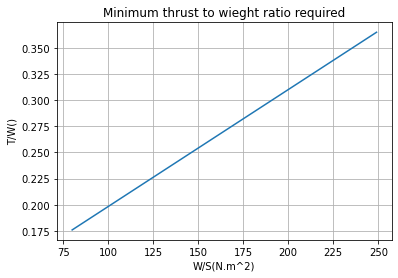

In [14]:
plt.plot(wingloadinglist_pa, twratio)
plt.ylabel('T/W()')
plt.xlabel('W/S(N.m^2)')
plt.title('Minimum thrust to wieght ratio required')
plt.grid(True)

liftoff speed as a function of wingloading

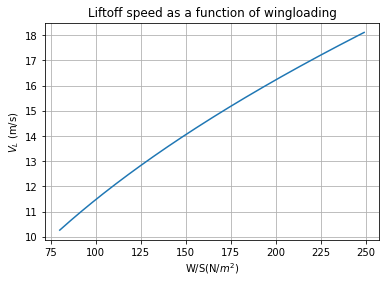

In [15]:
plt.plot(wingloadinglist_pa,liftoffspeed_mps)
plt.ylabel('$V_L$ (m/s)')
plt.xlabel('W/S(N/$m^2$)')
plt.title('Liftoff speed as a function of wingloading')
plt.grid(True)

# Sensitivity analysis for thrust weight ratio 

# Change in ground run

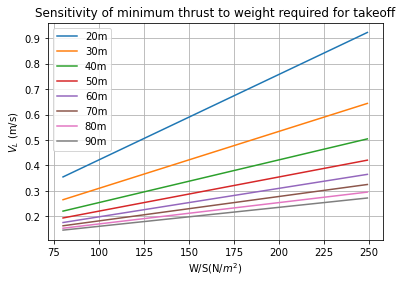

In [16]:
for groundrun_m in [20, 30, 40, 50, 60, 70, 80, 90]:
    designbrief = {'groundrun_m': groundrun_m}
    concept = ca.AircraftConcept(designbrief, designdefinition, designperformance,designatm)
    twratio, liftoffspeed_mps = concept.thrusttoweight_takeoff(wingloadinglist_pa)
    plt.plot(wingloadinglist_pa,twratio, label=str(groundrun_m)+'m')

legend = plt.legend(loc='upper left', fontsize='medium')
plt.ylabel('$V_L$ (m/s)')
plt.xlabel('W/S(N/$m^2$)')
plt.title('Sensitivity of minimum thrust to weight required for takeoff')
plt.grid(True)


Change in elevation height

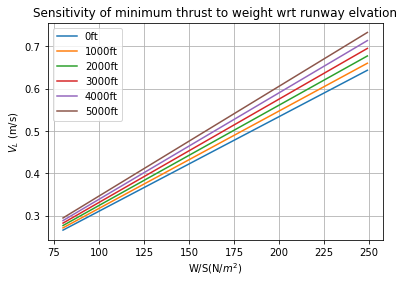

In [17]:

for elevation_ft in [0, 1000, 2000, 3000, 4000, 5000]:
    designbrief = {'groundrun_m':30, 'rwyelevation_m': co.feet2m(elevation_ft)}
    concept = ca.AircraftConcept(designbrief, designdefinition, designperformance,designatm)
    twratio, liftoffspeed_mps = concept.thrusttoweight_takeoff(wingloadinglist_pa)
    plt.plot(wingloadinglist_pa,twratio, label=str(elevation_ft)+'ft')
legend = plt.legend(loc='upper left', fontsize='medium')
             
plt.ylabel('$V_L$ (m/s)')
plt.xlabel('W/S(N/$m^2$)')
plt.title('Sensitivity of minimum thrust to weight wrt runway elvation')
plt.grid(True)
    

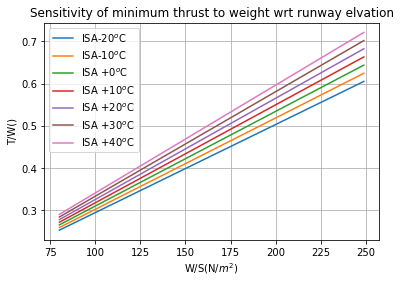

In [18]:
designbrief = {'groundrun_m':30, 'rwyelevation_m': 0}
for tmp_offset_deg in [-20, -10, 0, 10, 20, 30, 40]:
    designatm = atm.Atmosphere(offset_deg = tmp_offset_deg)
    concept = ca.AircraftConcept(designbrief, designdefinition, designperformance,designatm)
    twratio, liftoffspeed_mps = concept.thrusttoweight_takeoff(wingloadinglist_pa)
    
    
    if tmp_offset_deg<0:
        plt.plot(wingloadinglist_pa, twratio, label = 'ISA' + str(tmp_offset_deg)+'$^o$C')
    else:
        plt.plot(wingloadinglist_pa, twratio, label = 'ISA +' + str(tmp_offset_deg)+'$^o$C')

legend = plt.legend(loc='upper left', fontsize='medium')
             
plt.ylabel('T/W()')
plt.xlabel('W/S(N/$m^2$)')
plt.title('Sensitivity of minimum thrust to weight wrt runway elvation')
plt.grid(True)
    

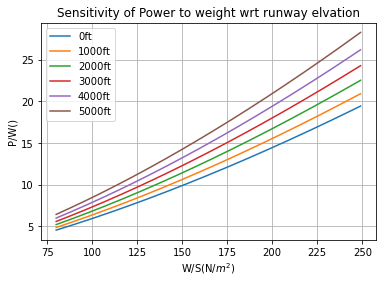

In [33]:
designdefinition = {'aspectratio':9, 'bpr':-1}
etap = {'takeoff': 0.6, 'climb':0.75, 'cruise': 0.85, 'turn':0.85, 'servceil':0.6}
designperformance = {'CDTP':0.0898, 'CLTO':0.97,'CLmax':1.7, 'mu_R':0.08, 'etaprop':etap}
designatm = atm.Atmosphere()
for elevation_ft in [0, 1000, 2000, 3000, 4000, 5000]:
    designbrief = {'groundrun_m':30, 'rwyelevation_m': co.feet2m(elevation_ft)}
    
    concept = ca.AircraftConcept(designbrief, designdefinition, designperformance,designatm)
    
    gffactor = atm.pistonpowerfactor(designatm.airdens_kgpm3(co.feet2m(elevation_ft)))
    
    twratio, liftoffspeed_mps = concept.thrusttoweight_takeoff(wingloadinglist_pa)
    
    pwratio = (1/gffactor)*ca.tw2pw(twratio, liftoffspeed_mps, etap['takeoff'])
    plt.plot(wingloadinglist_pa, pwratio, label = str(elevation_ft)+ 'ft')

legend = plt.legend(loc='upper left', fontsize='medium')
             
plt.ylabel('P/W()')
plt.xlabel('W/S(N/$m^2$)')
plt.title('Sensitivity of Power to weight wrt runway elvation')
plt.grid(True)

    
    

Thrust Mapping of a gas turbine engine

In [1]:
designdefinition = {'aspectratio':7.3, 'bpr':1, 'tr': 1.05}

designperformance = {'CDTP':0.04, 'CLTO':0.9,'CLmax':1.6, 'mu_R':0.02}

designbrief = {'groundrun_m':1200, 'rwyelevation_a': 1000}
    
wingloadinglist_pa = np.arange(2000,5000, 10)

designatm = atm.Atmosphere()
    
concept = ca.AircraftConcept(designbrief, designdefinition, designperformance,designatm)
    
twratio, liftoffspeed_mps = concept.thrusttoweight_takeoff(wingloadinglist_pa)
    
twratio1 = concept.map2static()*twratio

temp_c = designatm.airtemp_c(designbrief['rwyelevation_a'])
pressure_pa = designatm.airpress_pa(designbrief['rwyelevation_a'])
mach = designatm.mach(liftoffspeed_mps, designbrief['rwyelevation_a'])
throttleratio = designdefinition['tr']
correctionvec = []
for i, tw in enumerate(twratio):
    twratio_altcorr = atm.turbofanthrustfactor(temp_c, pressure_pa, mach[1], throttleratio, 'lowbpr')
    correctionvec.append(twratio_altcorr)
    
twratio2 = twratio1/correctionvec

plt.plot(wingloadinglist_pa, twratio, label = '$\overline{T}/W$')
plt.plot(wingloadinglist_pa, twratio1, label = '$T_\overline{T}/W$')
plt.plot(wingloadinglist_pa, twratio2, label = '$T_\mathrm{S}/W$(alt and Mach corrected)')

legend = plt.legend(loc='upper left', fontsize='medium')
             
plt.ylabel('P/W()')
plt.xlabel('W/S(N/$m^2$)')
plt.title('Sensitivity of Power to weight wrt runway elvation')
plt.grid(True)


NameError: name 'np' is not defined